<a href="https://colab.research.google.com/github/Koti-RK/Retail-Sales-Prediction/blob/main/Retail_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

**Problem Description**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment

# **Data Description**

Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores

**Data fields**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

*   Id - an Id that represents a (Store, Date) duple within the test set


*   Store - a unique Id for each store


*   Sales - the turnover for any given day (this is what you are predicting)



*   Customers - the number of customers on a given day





*   Open - an indicator for whether the store was open: 0 = closed, 1 = open
*   StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

*   SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

*   StoreType - differentiates between 4 different store models: a, b, c, d



*   Assortment - describes an assortment level: a = basic, b = extra, c = extended
*   CompetitionDistance - distance in meters to the nearest competitor store

*   CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened


*   Promo - indicates whether a store is running a promo on that day
*   Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating



*   Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

*   PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store








**Rossmann Sales Dataset** - This dataset is a live dataset of Rossmann Stores. On analysing this problem we observe that rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem. In this Notebook we work on following topics Analysing the dataset by using Exploratory Data Analysis using exponential moving averages analyse trends and seasonality in Rossmann dataset Analyse Regression using following prediction analysis. A) Linear Regression Analysis B)Elastic Regression (Lasso & Ridge Regression). C) Dession tree

In [2]:
# importing libraries

import pandas as pd
import numpy as np

from pandas import datetime as dt
from pandas import Series,DataFrame

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


from sklearn.model_selection import train_test_split


# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection

<ipython-input-2-4af7114a1d65>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
rossman_df= pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction/Rossmann Stores Data.csv')

<ipython-input-4-7436a05683c3>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df= pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction/Rossmann Stores Data.csv')


In [5]:
store_df = pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction/store.csv')

In [6]:
rossman_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
936291,477,4,2013-03-14,4063,368,1,0,0,0
97350,346,2,2015-05-05,9148,684,1,1,0,0
4505,46,1,2015-07-27,10068,896,1,1,0,0
990938,489,4,2013-01-24,8156,690,1,1,0,0
260065,372,6,2014-12-06,8634,775,1,0,0,0


In [7]:
rossman_df.shape

(1017209, 9)

In [8]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store_df.shape

(1115, 10)

In [11]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Checking null values**

In [12]:
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

No null values

In [13]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

we can see that there are lot of null values.. we have to deal with them.

<Axes: >

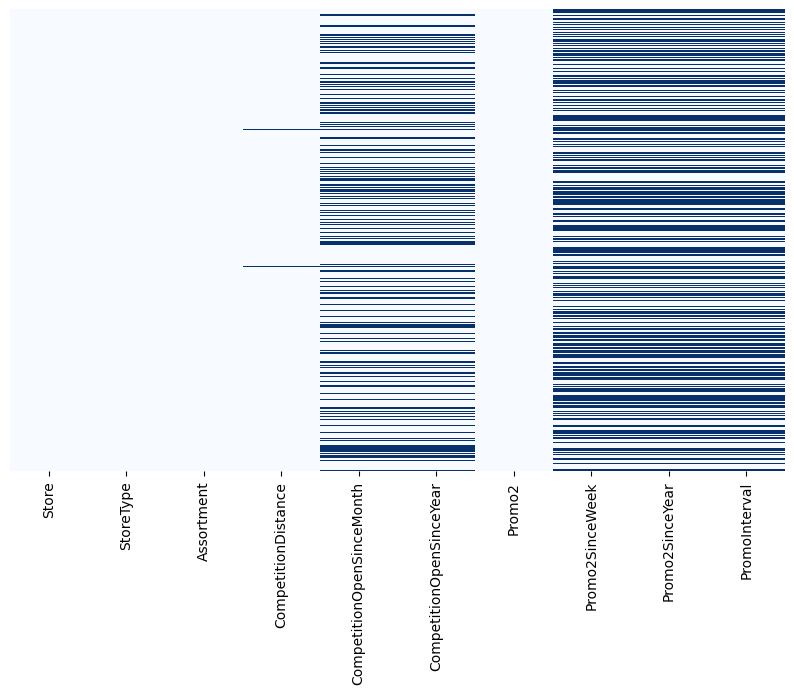

In [14]:
# heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'Blues')

<ipython-input-15-103fca95eed5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

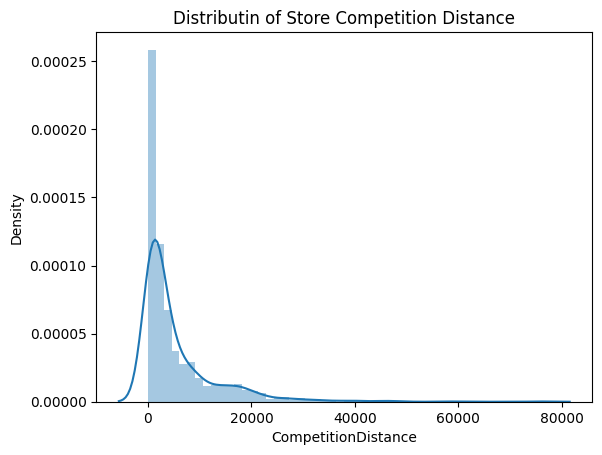

In [15]:
#Looking at distrubution
sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

Distribution is skewed towards right.. its better to replace this with median

In [16]:
# Replacing null values with median
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

We replace others null values with '0' since no events occured on those days.

In [17]:
# Replacing NAN values with 0 in CompetitionOpenSinceMonth
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)

# Replacing NAN values with 0 in CompetitionOpenSinceYear
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceWeek
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceYear
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)

# Replacing NAN values with 0 in PromoInterval
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [18]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**Merging Data Frames**

Now as the NAN values were removed I have decided to merge the two dataframes with left join on rossmann_df, as the rossmann data had more columns

In [19]:
merged_df = pd.merge(rossman_df, store_df, on='Store',how='left')

In [20]:
merged_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
50652,478,2,2015-06-16,8516,775,1,1,0,0,d,c,1940.0,3.0,2012.0,0,0.0,0.0,0
498851,117,4,2014-04-10,3574,461,1,0,0,0,a,a,3450.0,9.0,2011.0,0,0.0,0.0,0
914816,187,2,2013-04-02,6349,853,1,0,0,1,a,c,19360.0,0.0,0.0,0,0.0,0.0,0
947661,697,1,2013-03-04,14422,1225,1,1,0,0,d,a,3780.0,0.0,0.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
238383,166,1,2014-12-29,8841,1193,1,0,0,1,a,c,100.0,4.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


In [21]:
merged_df.shape

(1017209, 18)

In [22]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


**Changing different dtypes to int type**

In [23]:
merged_df.loc[merged_df['StateHoliday'] == '0', 'StateHoliday'] = 0
merged_df.loc[merged_df['StateHoliday'] == 'a', 'StateHoliday'] = 1
merged_df.loc[merged_df['StateHoliday'] == 'b', 'StateHoliday'] = 2
merged_df.loc[merged_df['StateHoliday'] == 'c', 'StateHoliday'] = 3
merged_df['StateHoliday'] = merged_df['StateHoliday'].astype(int, copy=False)

In [24]:
merged_df.loc[merged_df['Assortment'] == 'a', 'Assortment'] = 0
merged_df.loc[merged_df['Assortment'] == 'b', 'Assortment'] = 1
merged_df.loc[merged_df['Assortment'] == 'c', 'Assortment'] = 2
merged_df['Assortment'] = merged_df['Assortment'].astype(int, copy=False)


In [25]:
merged_df.loc[merged_df['StoreType'] == 'a', 'StoreType'] = 0
merged_df.loc[merged_df['StoreType'] == 'b', 'StoreType'] = 1
merged_df.loc[merged_df['StoreType'] == 'c', 'StoreType'] = 2
merged_df.loc[merged_df['StoreType'] == 'd', 'StoreType'] = 3
merged_df['StoreType'] = merged_df['StoreType'].astype(int, copy=False)

In [26]:
# Changing the data format from object to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format = '%Y-%m-%d')

In [27]:
merged_df['CompetitionOpenSinceYear'] = merged_df['CompetitionOpenSinceYear'].astype(int)
merged_df['Promo2SinceYear'] = merged_df['Promo2SinceYear'].astype(int)

In [28]:
merged_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(merged_df['Date']).month

In [29]:
merged_df['CompetitionDistance'] = merged_df['CompetitionDistance'].astype(int)
merged_df['Promo2SinceWeek'] = merged_df['Promo2SinceWeek'].astype(int)

In [30]:
merged_df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

Successfully changed data types.

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

**Exploratory Data Analysis**

Text(0.5, 1.0, 'Store Daily Open Countplot')

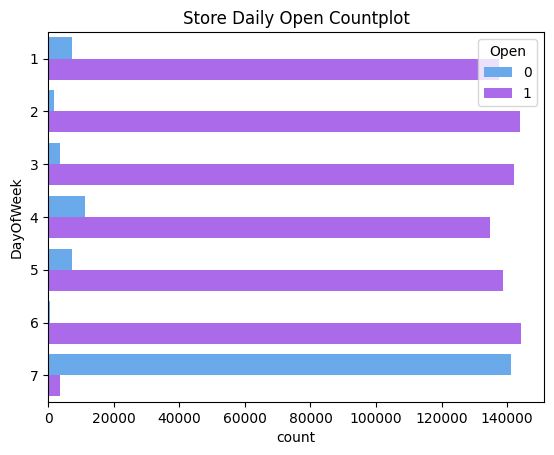

In [35]:
#Plot between DayOfWeek and Store Daily open
sns.countplot(y= 'DayOfWeek', hue= 'Open', data= merged_df, palette='cool')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

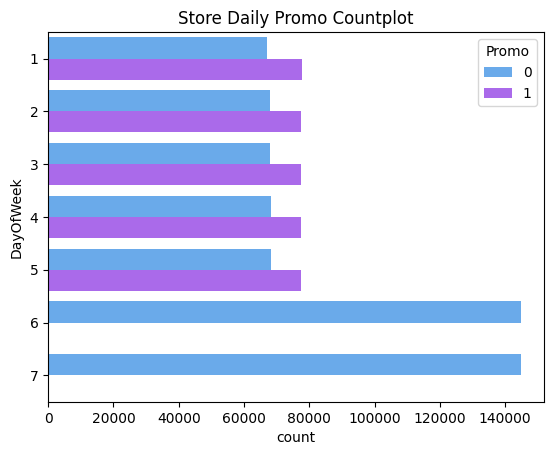

In [36]:
#plot between day of the week and Store daily promo
sns.countplot(y= 'DayOfWeek', hue='Promo', data= merged_df, palette= 'cool')
plt.title('Store Daily Promo Countplot')

<Axes: xlabel='Promo', ylabel='Sales'>

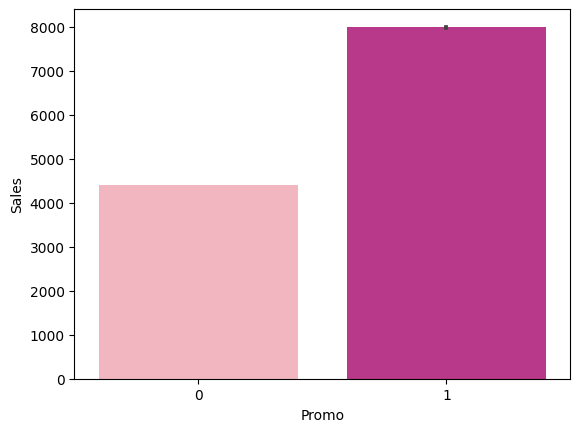

In [37]:
#Promo Sales
sns.barplot(x= 'Promo', y= 'Sales', data= merged_df, palette= 'RdPu')

**Sales during state holiday and school holiday**

0 = Public Holiday, 1 = Easter Holiday, 2 = Chirstmas, 3 = None

Text(0.5, 1.0, 'Sales During State Holiday')

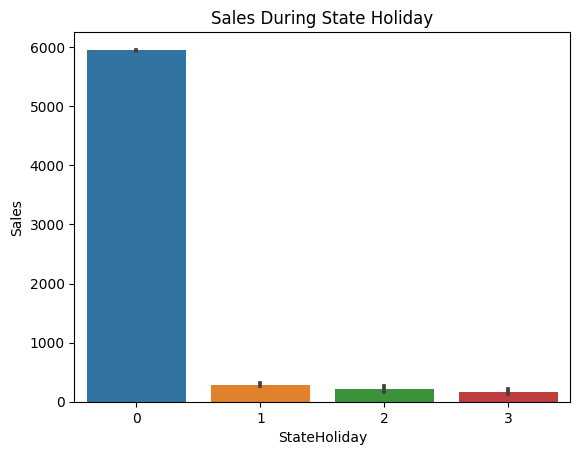

In [38]:
Stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=merged_df)
plt.title('Sales During State Holiday')

Text(0.5, 1.0, 'Sales During School Holiday')

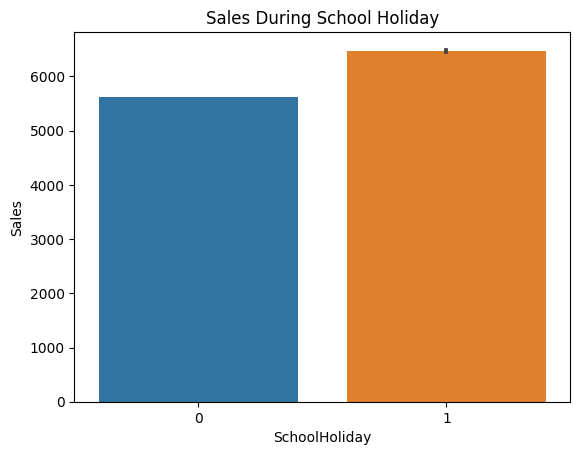

In [39]:
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales",data=merged_df)
plt.title('Sales During School Holiday')

Text(0.5, 1.0, 'Boxplot For Sales Values')

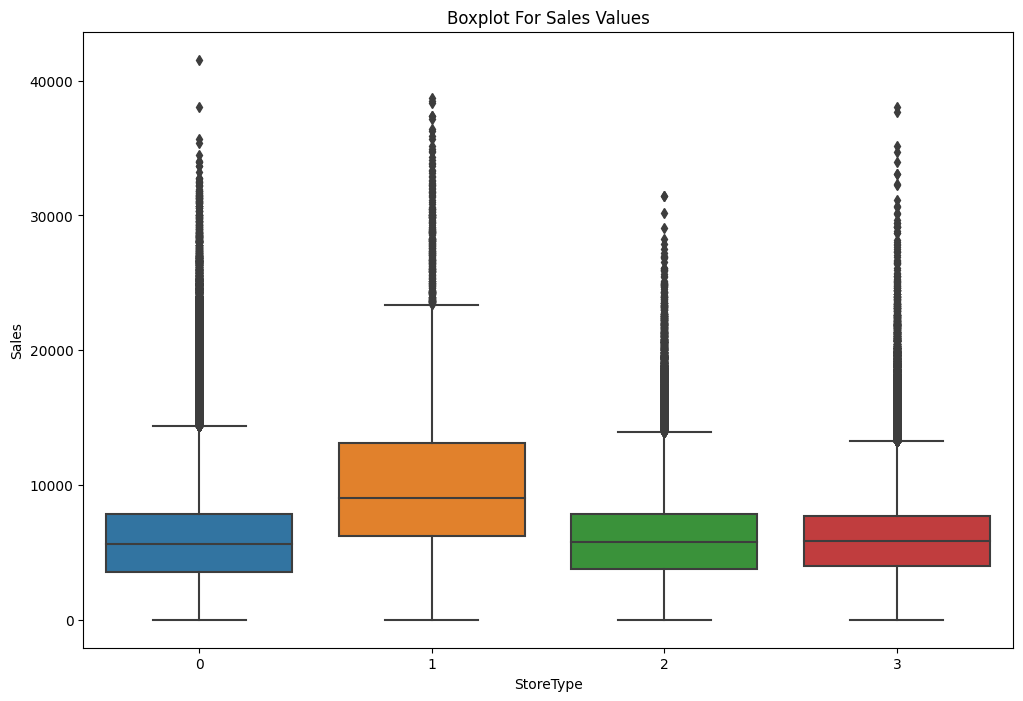

In [40]:
#Boxplot For Sales Values
plt.figure(figsize=(12,8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=merged_df)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales  Values on the basis of Assortment Level')

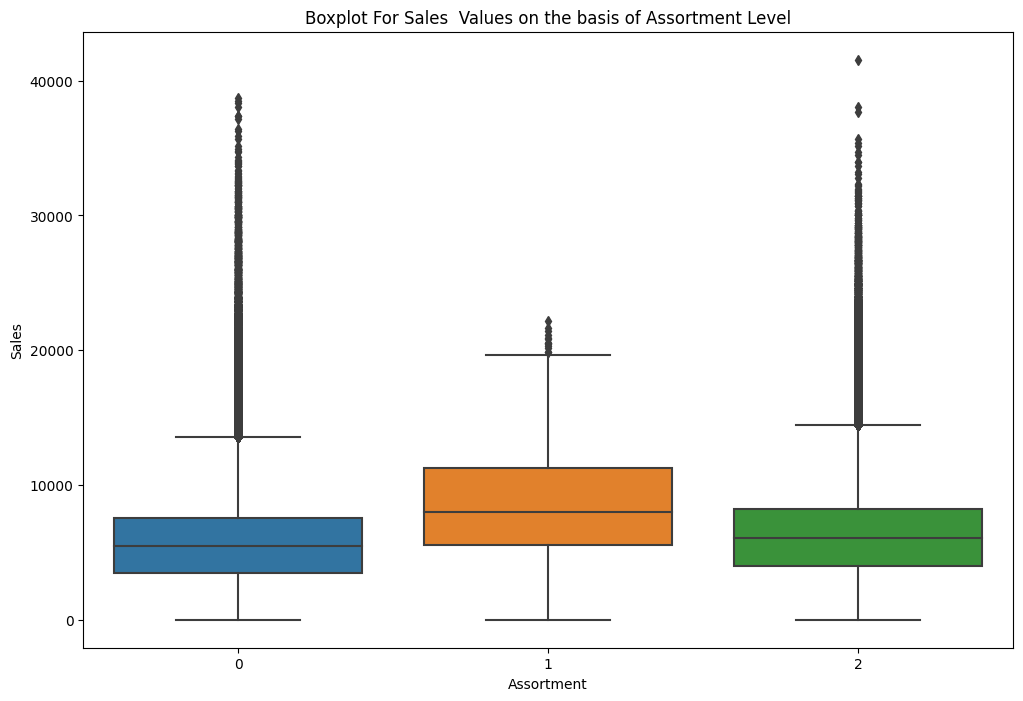

In [41]:
#Boxplot For Sales  Values on the basis of Assortment Level
plt.figure(figsize=(12,8))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=merged_df)
plt.title('Boxplot For Sales  Values on the basis of Assortment Level')

# **Store Type**

<ipython-input-43-f5ddd6d8332a>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-43-f5ddd6d8332a>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-43-f5ddd6d8332a>:9: FutureWarning: The default value of numeric_only in DataF

Text(0.5, 1.0, 'Average Sales per Store Type \n Fig 1.4')

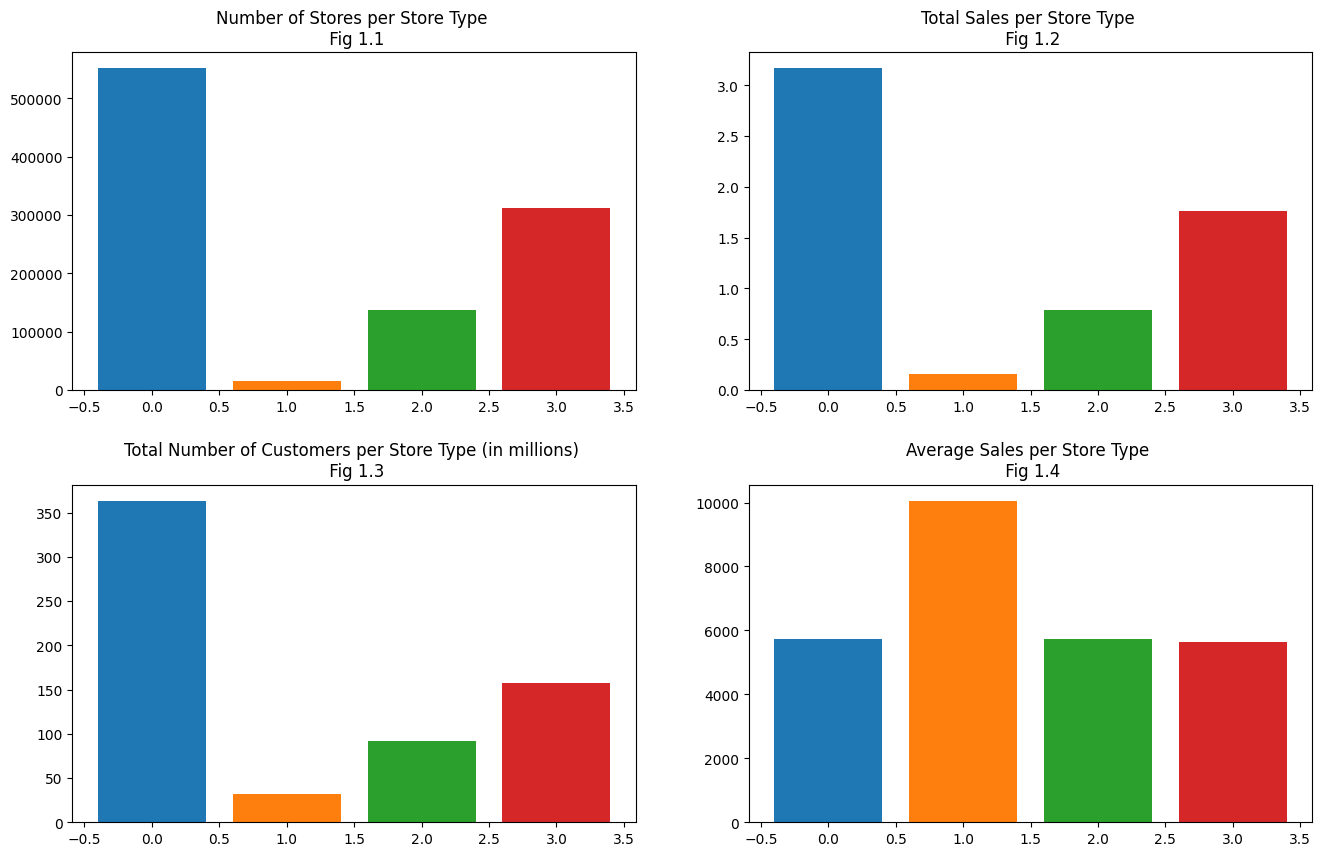

In [43]:
import itertools
fig, axes = plt.subplots(2,2,figsize=(16,10))
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(merged_df.groupby(by="StoreType").count().Store.index, merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in millions) \n Fig 1.3")
axes[1,1].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")